# 1 Import Data

In [2]:
### Read downloaded Json file from DynamoDB
import  pandas as pd
%matplotlib inline
pd.options.display.max_rows=10
pd.options.display.max_columns=8

df = pd.read_json('C:\\Users\\tyyg\\Dropbox\\Personal Team Folder\\Sample Project A Tony\\tweets_bank.json')
df

,twitter
0,"{'location': 'Costa Rica', 'geo': 'None', 'twe..."
1,"{'location': 'Ukraine, Nikolaev', 'geo': 'None..."
2,"{'location': 'Galaktikos', 'geo': 'None', 'twe..."
3,"{'location': 'Ontario, Canada', 'geo': 'None',..."
4,"{'location': 'None', 'geo': 'None', 'tweet': '..."
...,...
17923,"{'location': 'Milano', 'geo': 'None', 'tweet':..."
17924,"{'location': 'None', 'geo': 'None', 'tweet': '..."
17925,"{'location': 'None', 'geo': 'None', 'tweet': '..."
17926,"{'location': 'None', 'geo': 'None', 'tweet': '..."


In [3]:
### format Json file to dataframe
df=pd.read_json(df['twitter'].to_json(),orient='index')
df

,created_at,followers_count,geo,id,location,screen_name,tweet,username
0,2016-12-18 07:41:23,105,None,810389482939748352,Costa Rica,amanda_cr,Fiesta Navidad Scotiabank Pty! https://t.co/SO...,amanda_cr
1,2016-12-18 08:00:11,393,None,810394214244741120,"Ukraine, Nikolaev",TJ_YourChoice,RT @moskandogg: https://t.co/iCKbwo9aJM,Fedorov Sergey
10,2016-12-18 08:09:34,1430,None,810396572806692864,None,job_canada_,"Scotiabank: Administrative Assistant (Toronto,...",JOBS Canada
100,2016-12-18 09:28:24,199,None,810416412372111360,None,alekk,RT @azazet: \n \nhttps://t.co/M1,????
1000,2016-12-21 03:14:18,993,None,811409431837769728,Ohio,BrentWrightWeb,RT @cavs: KYRI3 DEEP IN THE BMO \n#DefendtheLand,Brent Wright
...,...,...,...,...,...,...,...,...
9995,2016-12-24 05:48:43,1565,"{u'type': u'Point', u'coordinates': [50.995594...",812535454843146240,"Calgary, Alberta",MapleLeaf_Tom,Going to the movies (@ Scotiabank Theatre - @c...,Thomas
9996,2016-12-24 05:49:28,338,None,812535644153061376,Toronto,ChicagoCuddz,@Raptors @BMO Great game #Raptors \n#WeTheNorth,IG: NotOfThisCod ?
9997,2016-12-24 05:49:53,106,None,812535749648257024,None,wasimulc,@Raptors @BMO SHADE,TheSlugger
9998,2016-12-24 05:50:00,2376,None,812535778865741824,"London, England",gimletech,Wall St is expecting 4.86% YoY revenue growth ...,Value Gimletech


In [4]:
# classify tweets into bank
bank = [None]*len(df.index)
for i in range(len(df.index)):
    if "CIBC" in df.loc[i]['tweet'].upper():bank[i]='CIBC'
    elif 'RBC' in df.loc[i]['tweet'].upper(): bank[i]='RBC'
    elif 'SCOTIABANK' in df.loc[i]['tweet'].upper(): bank[i]='Scotiabank'
    elif 'BMO' in df.loc[i]['tweet'].upper(): bank[i]='BMO'
    elif 'TD' in df.loc[i]['tweet'].upper(): bank[i]='TD'
df['bank']=bank
df

,created_at,followers_count,geo,id,...,screen_name,tweet,username,bank
0,2016-12-18 07:41:23,105,None,810389482939748352,...,amanda_cr,Fiesta Navidad Scotiabank Pty! https://t.co/SO...,amanda_cr,Scotiabank
1,2016-12-18 08:00:11,393,None,810394214244741120,...,TJ_YourChoice,RT @moskandogg: https://t.co/iCKbwo9aJM,Fedorov Sergey,None
10,2016-12-18 08:09:34,1430,None,810396572806692864,...,job_canada_,"Scotiabank: Administrative Assistant (Toronto,...",JOBS Canada,None
100,2016-12-18 09:28:24,199,None,810416412372111360,...,alekk,RT @azazet: \n \nhttps://t.co/M1,????,RBC
1000,2016-12-21 03:14:18,993,None,811409431837769728,...,BrentWrightWeb,RT @cavs: KYRI3 DEEP IN THE BMO \n#DefendtheLand,Brent Wright,RBC
...,...,...,...,...,...,...,...,...,...
9995,2016-12-24 05:48:43,1565,"{u'type': u'Point', u'coordinates': [50.995594...",812535454843146240,...,MapleLeaf_Tom,Going to the movies (@ Scotiabank Theatre - @c...,Thomas,BMO
9996,2016-12-24 05:49:28,338,None,812535644153061376,...,ChicagoCuddz,@Raptors @BMO Great game #Raptors \n#WeTheNorth,IG: NotOfThisCod ?,RBC
9997,2016-12-24 05:49:53,106,None,812535749648257024,...,wasimulc,@Raptors @BMO SHADE,TheSlugger,BMO
9998,2016-12-24 05:50:00,2376,None,812535778865741824,...,gimletech,Wall St is expecting 4.86% YoY revenue growth ...,Value Gimletech,RBC


# Text Pre-processing

###### All tweets are processed to remove unnecessary things like links, non-English words, stopwords, punctuation’s, etc.

In [5]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re, string
import nltk
tweets_texts = df["tweet"].tolist()
stopwords=stopwords.words('english')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
def process_tweet_text(tweet):
    if tweet.startswith('@null'): return "[Tweet not available]"
    tweet = re.sub(r'\$\w*','',tweet) # Remove tickers
    tweet = re.sub(r'https?:\/\/.*\/\w*','',tweet) # Remove hyperlinks
    tweet = re.sub(r'['+string.punctuation+']+', ' ',tweet) # Remove puncutations like 's
    twtok = TweetTokenizer(strip_handles=True, reduce_len=True)
    tokens = twtok.tokenize(tweet)
    tokens = [i.lower() for i in tokens if i not in stopwords and len(i) > 2 and  
                                                 i in english_vocab]
    return tokens

cleaned_tweets = []
for tw in tweets_texts:
    words = process_tweet_text(tw)
    cleaned_tweet = " ".join(w for w in words if len(w) > 2 and 
w.isalpha()) #Form sentences of processed words
    cleaned_tweets.append(cleaned_tweet)
df['CleanTweetText'] = cleaned_tweets

df['tweet']=cleaned_tweets
df.drop()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 'head high note',
 'top big tech',
 'start holiday break donation',
 '',
 'loud line late lopsided win support quite',
 '',
 '',
 '',
 '',
 '',
 'head high note',
 'head high note',
 'office legally eligible work',
 '',
 '',
 'bile',
 'office legally eligible work location',
 'head high note',
 '',
 '',
 '',
 'everyone happy',
 'head high note',
 '',
 'less company keeping going anywhere',
 '',
 'blunt',
 'shopping cotton',
 'head high note',
 'self fourth quarter',
 '',
 '',
 '',
 'loud line late lopsided win support quite',
 '',
 '',
 'closed banking like mobile banking',
 'closed banking like mobile banking',
 '',
 'head high note',
 'via',
 '',
 'via',
 '',
 '',
 '',
 '',
 '',
 '',
 'shell select money every tired scandal street',
 'wish old still exist talking still thing',
 '',
 '',
 'top big tech',
 'magic',
 '',
 '',
 'loud line late lopsided win support quite',
 '',
 'tell private phone twice bank like bad',
 '',
 '',
 '',
 '',
 '',
 'divisi

## Exploration

In [35]:
### send tweet to text-processing.com via HTTP
import requests

response=[None]*len(df.index)
url = 'https://japerk-text-processing.p.mashape.com/sentiment/'
header = {'X-Mashape-Key': 'hqvR8aeU6DmshHGgpGaompgKozF3p1n3S46jsngtsamUeIH1gq',
          'Content-Type': 'application/x-www-form-urlencoded',
          'Accept': 'application/json'}

while i < len(df.index):
    data = {"language": "english","text":df.loc[i]['tweet']}
    response[i] = requests.post(url,data=data,headers=header).json()
    i=i+1

df['response']=response

In [157]:
df3.head()

,created_at,followers_count,geo,id,location,screen_name,tweet,username,response,bank,sentiment
0,2016-12-18 07:41:23,105,None,810389482939748352,Costa Rica,amanda_cr,Fiesta Navidad Scotiabank Pty! https://t.co/SO...,amanda_cr,"{'label': 'neg', 'probability': {'neutral': 0....",Scotiabank,neg
1,2016-12-18 08:01:09,2720,None,810394458172833792,"Ontario, Canada",7ooralshammery,RT @ONheritage: Enter the @RBC #BlackHistoryMo...,Faisal F,"{'label': 'neutral', 'probability': {'neutral'...",RBC,neutral
2,2016-12-18 08:01:09,2720,None,810394458172833792,"Ontario, Canada",7ooralshammery,RT @ONheritage: Enter the @RBC #BlackHistoryMo...,Faisal F,"{'label': 'neutral', 'probability': {'neutral'...",RBC,neutral
3,2016-12-18 08:01:09,2720,None,810394458172833792,"Ontario, Canada",7ooralshammery,RT @ONheritage: Enter the @RBC #BlackHistoryMo...,Faisal F,"{'label': 'neutral', 'probability': {'neutral'...",RBC,neutral
4,2016-12-18 08:02:01,1062,None,810394675471228928,None,RBCmng,"RBC 48-60(17-24,23-16,8-20,-)A'nknown\n\n # #r...",tk21,"{'label': 'neutral', 'probability': {'neutral'...",RBC,neutral


In [120]:
bank = [None]*len(df3.index)
for i in range(len(df3.index)):
    if "CIBC" in df3.loc[i]['tweet'].upper():bank[i]='CIBC'
    elif 'RBC' in df3.loc[i]['tweet'].upper(): bank[i]='RBC'
    elif 'SCOTIABANK' in df3.loc[i]['tweet'].upper(): bank[i]='Scotiabank'
    elif 'BMO' in df3.loc[i]['tweet'].upper(): bank[i]='BMO'
    elif 'TD' in df3.loc[i]['tweet'].upper(): bank[i]='TD'

In [121]:
df3['bank']=bank


In [176]:
df3.to_csv('tweets_bank_sentiment')

In [149]:
#df3['label']=df3.
prop=[]
for i in range(len(df3.index)):
    label.append(df3.loc[i,'response']['label'])


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
df.pipe((sns.countplot,'data'), y="bank", hue="sentiment")

NameError: name 'df' is not defined

In [30]:
from wordcloud import WordCloud,STOPWORDS

In [31]:
df=df[df['sentiment']=='neg']
words = ' '.join(df['tweet'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word.lower()
                                 and 'cibc' not in word.lower()
                         and 'bmo' not in word.lower()
                         and 'rbc' not in word.lower()
                         and 'scotiabank' not in word.lower()
                         and 'td' not in word.lower()
                         and 'bank' not in word.lower()
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

KeyError: 'sentiment'

In [29]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

NameError: name 'WordCloud' is not defined

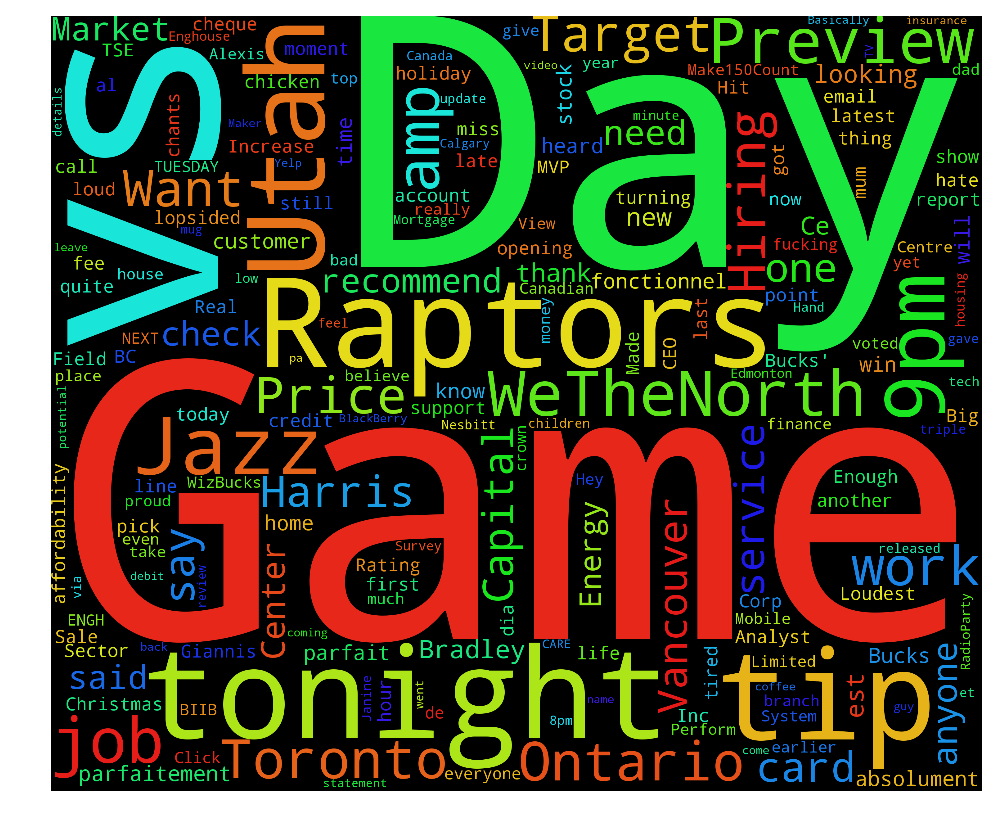

In [172]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()